## 1. Introduction
  ### The case description
  This notebook covers a Python-based solution of the machine learning for the "PLGA case". In the case we will be trying to develop a model for prediction of API dissolution from PLGA particles. The drug release from the PLGA matrix is mainly governed by two mechanisms: diffusion and degradation/erosion. Altough, those mechanisms are affected by many factors. For example, pore diameters, matrix–API interactions, API–API interactions, and formulation composition. Results reported in the literature indicate the high level of complexity of drug release from PLGA-based formulations. Therefore, it seems reasonable to use machine learning algorithms to search for optimal model.  
  
The data sets were collected from the literature. Release rates of 68 PLGA formulations from 18 publications were extracted from the publications and maunally digitized. The description of each point was completed by the __(1)__ formulation characteristics (PLGA inherent viscosity, PLGA molecular weight, lactide-to-glycolide ratio, inner and outer phase Polyvinyl alcohol (PVA) concentration, PVA molecular weight, inner phase volume, encapsulation rate, mean particle size, and PLGA concentration); __(2)__ the experimental conditions (dissolution pH, number of dissolution additives, dissolution additive concentration and production method, and dissolution time); and __(3 & 4)__ the molecular descriptors of the macromolecules and  excipients. Overall there were 745 data rows with 300 variables. The molecular descriptors were computed using Marvin cxcalc plugin, UK (https://chemaxon.com/products/calculators-and-predictors). The amount of the drug substance released (Q) was the only dependent variable.  

In this case study we'll implement AutoML workflow based on the Open Source machine learning platform h2o. H2O has an easy-to-use interface which automates the process of training a large selection of candidate models. It uses Java engine to enable the access to a variety of machine learning algorithms. H2O’s AutoML can be used for automating the machine learning workflow, which includes automatic training and tuning of many models within a user-specified time-limit.

![](img/PLGA_dataset_overview.png)

  ### Why to use AutoML at all? Can it be useful?
  The concept of automation in computer science is not something new. It started at the very begining of computers themselves from the design of the first automatic mechanical calculator (1822), through ENIAC (1940s) to automated machine learning (last 20-30 years).
  

![](img/AutoML_historyline.png)

The standard data science process requires repetitive going through all listed below steps. From 'raw data' to 'model validation'. The trick is that you cannot skip none of them. The most of the time data scientist spends on the four crutial steps in the whole process - feature selection, algorithm selection, model development and parameters optimization. 

![](img/Standard_ML_workflow.png)

The concept of autoML is that it should automate the most time consuming steps.

![](img/AutoML_historyline_v2.png)

In this example we will be using an Open Source h2o package (R, Python). H2O is a ML platform that allows to build reliable models and productionalize them within hours (well, all depends on the data, but it is possible :)). 
  https://www.h2o.ai/products/h2o/

## 2. H2O installation  
 ### Installing R & h2o:
   1. Go to http://cran.r-project.org/mirrors.html.
   2. Select your closest local mirror.
   3. Select your operating system (Linux, OS X, or Windows).
   4. Depending on your OS, download the appropriate file, along with any required packages.
   5. When the download is complete, unzip the file and install.
   6. Start R (if you want to make the package available to all users run R as root)
   
   Then you must copy&paste the below code into the R-terminal:

`# Copy and paste the following commands in R to download dependency packages.`  
`pkgs <- c("methods","statmod","stats","graphics","RCurl","jsonlite","tools","utils")`  
`for (pkg in pkgs) {if (! (pkg %in% rownames(installed.packages()))) { install.packages(pkg) }}`  
  
`# Run the following command to load the H2O:`  
`library(h2o)`  
  
`# Run the following command to initialize H2O on your local machine (single-node cluster) using all available CPUs.`  
`h2o.init()`  
  
`# Import the Iris (with headers) dataset.`  
`path <- "smalldata/iris/iris_wheader.csv"`  
`iris <- h2o.importFile(path)`  
  
`# View a summary of the imported dataset.`  
`print(iris)`  
If you wish you can also use an IDE - R Studio to develop your code.  
https://rstudio.com/products/rstudio/

 ### Installing Anaconda & h2o (Python)
The best way of installing h2o in Python is to do it through virtual environment. Threfore we need an environment manager.  

There are two choices:  
 1. PIP (with virtualenv) - https://pypi.org/project/pip/
 2. Conda - https://www.anaconda.com/

We will be using Conda, bacause it is more simple, transparent, flexible and has more features (Spyder, Orange, Jupyter and more).  
  
  __Installing Anaconda__:
   1. Go to https://www.anaconda.com/.
   2. Select your OS (Windows/MacOS/Linux).
   3. Select your architecture (64-bit or Power8/Power9).
   4. Depending on your OS, download the Installer file.
   5. When the download is complete, run the Installer.
   6. Follow the instructions based on your OS system:
     - Windows https://docs.anaconda.com/anaconda/install/windows/
     - macOS https://docs.anaconda.com/anaconda/install/mac-os/
     - Linux https://docs.anaconda.com/anaconda/install/linux/

After installation is finished, you can verify the installation by running anaconda-navigator (https://docs.anaconda.com/anaconda/install/verify-install/).  
For greater transparency in this example we will install all dependencies via the __console/terminal__ or __anaconda CLI__:  
1. Run console/terminal (or Anaconda prompt in Windows)
2. Add two channels (conda-forge and h2oai) to conda configuration.  
`conda config --add channels conda-forge`  
`conda config --add channels h2oai`
3. Now use the `requirements_essential_linux.txt` or `requirements_essential_Win10.txt` (according to your OS) file as the source of required packages:  
  `conda create --name <name of environment> python=3.6.5 --file <path to requirements.txt file>`  
In my case (linux) the command looked like:  
  `conda create --name h2o python=3.6.5 --file ./requirements_essential_linux.txt`  
4. After a while you will have virtual python environment. To use it run in your console:  
  `conda activate <name of environment>`

 ## 3. The case
 

## Notice  
There are few options to run the example.  
  1. One of them is to type `jupyter-notebook` in the `Anaconda prompt` or in the terminal, when activated h2o environment (through `conda activate h2o`). But please ensure that you have access to h2o packages via `import h2o`. If not, please try to install `nb_conda_kernels` by typing `conda install nb_conda_kernels` or manually add apriopriate kernel by typing `\path\to\python\environment -m ipykernel install --user --name h2o --display-name "Python (h2o)"`.  
  2. Sometimes it may be necessary to run the notebook providing the full path (e.g.)  
  `~/anaconda3/envs/{name of your environment}/bin/jupyter-notebook`
  3. You can also run a Python console from your environment and provide the code line-by-line
  4. In order to have the `shap` plots rendered, please make the notebook `Trusted` (https://jupyter-notebook.readthedocs.io/en/latest/security.html or https://stackoverflow.com/questions/44943646/jupyter-notebook-not-trusted)  

  ### Imports, functions & directories
  If you have created the conda environment as previously noted (`conda create --name <name of environment> --file <path to requirements.txt file>`), you shouldn't have problems loading imports.

In [2]:
import os
import string
import random
import glob
import h2o
import statistics
import psutil
import csv
import sys
import re
import shap
import pickle
import pandas as pd
import numpy as np
from h2o.automl import H2OAutoML
from pathlib import Path
from random import randint
from math import sqrt
from sklearn.model_selection import GroupShuffleSplit
from copy import copy
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GroupKFold # import KFold
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt


After importing necessary packages, we will define a function used for generating random names and a wrapper class which will be used for calculation of shap values.

In [2]:
# -------------------------------
# Random key generator - function
# -------------------------------
def random_key_generator(size=6, chars=string.ascii_letters + string.digits):
    return ''.join(random.choice(chars) for _ in range(size))
# -------------------------------------------------------------------------------

# --------------------------------------------------------------------------------
# H2OPredWrapper - class used for obtaining predictions understood by shap package
# --------------------------------------------------------------------------------
class H2OPredWrapper:
    def __init__(self, h2o_model, feature_names):
        self.h2o_model = h2o_model
        self.feature_names = feature_names
    def predict(self, X):
        if isinstance(X, pd.Series):
            X = X.values.reshape(1,-1)
        self.dataframe= pd.DataFrame(X, columns=self.feature_names)
        self.predictions = self.h2o_model.predict(h2o.H2OFrame(self.dataframe)).as_data_frame().values
        return self.predictions.astype('float64')[:,-1]
# --------------------------------------------------------------------------------

### Initial h2o server configuration 
Here we have variables which will be used later in order to launch the h2o server and run the modeling. We will briefly discuss them.  
The first part is to run the h2o server:

In [3]:
server_multicore: bool = True
my_max_ram_allowed: int = 16

Next we initialize variables to specify seeds, if needed, basically in a presented approach the seeds are generated at the begining of the feature selection and are the same for 10-cv. Therefore there is no need to specify them, they are pointed here for transparancy.

In [4]:
# user specified seeds
my_seed_FS: int = 1
my_seed_FS_10cv: int = 1

Here are some parameters of the simulations. We will be doing 10-cv and we will assign data to folds. We will treat whole dissolution profile as a sample. So there will be as many samples as we have dissolution profiles. 
Here are three main sections:
  1. General options - data set file name, keep cross validation results, save Java objects
  2. Feature selection options - execution time, how many short loops, scale, include features, __threshold__
  3. Cross validation options - how many folds, execution time

In [5]:
# -------------------------
# General options:
# -------------------------
fs_data: str = 'PLGA_300in_SR_BAZA.txt' # Please provide full filename if perform_FS is True or classic_approach without n-fold cv are to be run

my_keep_cross_validation_predictions: bool = True
my_keep_cross_validation_models: bool = True
my_keep_cross_validation_fold_assignment: bool = True

# save pojo or mojo model boolean = True/False
save_pojo_or_mojo: bool = True

# Which column contains indicies to make split - 1 = 1st col, 2 = 2nd col etc. 
index_column: int = 1

# --------------------------
# Feature selection options:
# --------------------------
# Feature selection AutoML execution time
FS_h2o_max_runtime_secs: int = 45
FS_h2o_max_runtime_secs_2nd_time: int = 10*60

# How many loops of FS
my_FS_loops: int = 6

# Scale by original score or RMSE - this is only for comparison with fscaret - set False to scale by the RMSE
# - only if perform_FS is True
original_scale: bool = True

# create core file name - used only when perform_FS is True to create filenames
core_filename: str = 'new_PLGA'

# Manually include features, eg. 'Time_min' in dissolution profile 
# - used only when perform_FS is True
include_features: list = []

# Feature selection threshold - range = [0; 1] - usually between 0.01 and 0.001
# - only if perform_FS is True
fs_threshold: float = 0.01

# Feature selection short loop RMSE threshold
# - only if perform_FS is True
rmse_fs_short_loop_threshold: float = 15.0


# --------------------------
# Cross validation options:
# --------------------------

# How many fold in cross validation is used only if perform_FS is True
no_folds: int = 10

# 10cv AutoML execution time after feature selection
h2o_max_runtime_secs_10cv: int = 20*60

We will also generate a random port number (this step is not necessary if you run one server on one machine)

In [6]:
# generate random port number
# -------------------------------
my_port_number = random.randint(54322,65000)

# Create three random strings
# -------------------------
aml_name = 'A' + random_key_generator(15) # for FS project name
aml2_name = 'A' + random_key_generator(15) # for 10-cv project name
cluster_name = 'A' + random_key_generator(15) # for h2o cluster name

Next we need to create directories to store data set, models, temporary results and exported pojo or mojo objects.

In [7]:
# get current directory (PosixPath)
# -----------------------
my_current_dir = Path.cwd()

# get export directory and other subdirs (PosixPath)
# -----------------------
my_export_dir = my_current_dir.joinpath(str(my_current_dir) + '/export')
my_10cv_FS_dir = my_current_dir.joinpath(str(my_current_dir) + '/10cv_FS')
my_10cv_orig_dir = my_current_dir.joinpath(str(my_current_dir) + '/10cv_orig')
my_test_external = my_current_dir.joinpath(str(my_current_dir) + '/test_external')
my_pojo_or_mojo_FS = my_current_dir.joinpath(str(my_current_dir) + '/pojo_or_mojo_FS')
my_pojo_or_mojo_10cv = my_current_dir.joinpath(str(my_current_dir) + '/pojo_or_mojo_10cv')
my_model_FS = my_current_dir.joinpath(str(my_current_dir) + '/model_FS')
my_model_10cv = my_current_dir.joinpath(str(my_current_dir) + '/model_10cv')

# check subdirectory structure
# ----------------------------------------
Path(my_export_dir).mkdir(parents=True, exist_ok=True)
Path(my_10cv_FS_dir).mkdir(parents=True, exist_ok=True)
Path(my_10cv_orig_dir).mkdir(parents=True, exist_ok=True)
Path(my_test_external).mkdir(parents=True, exist_ok=True)
Path(my_pojo_or_mojo_FS).mkdir(parents=True, exist_ok=True)
Path(my_pojo_or_mojo_10cv).mkdir(parents=True, exist_ok=True)
Path(my_model_FS).mkdir(parents=True, exist_ok=True)
Path(my_model_10cv).mkdir(parents=True, exist_ok=True)


We have to check the resources (threads and available RAM). This code allows to allocate as much RAM per thread as it can, but not less then 2G per thread. Be advised that for the purpose of this case number of threads available were reduced by 2 `my_cores = psutil.cpu_count() - 2`.

In [8]:
# check runtime mode - either many servers on the machine (server_multicore = F) or one server per one machine (server_multicore = T)
# -------------------------------------------
if server_multicore is True:
    my_cores = psutil.cpu_count() - 2
else:
    my_cores = 1

# check system free mem and apply it to the server
# ------------------------------------------------
memfree = psutil.virtual_memory().total
memfree_g = int(round(memfree/1024/1024/1024,3))

if memfree_g < 2:
 memfree_g = 2+'G'

if my_max_ram_allowed > 0:
  memfree_g = str(my_max_ram_allowed)+'G'


 ### Running the h2o server

Now it is high time to start the h2o server.

In [9]:
# -------------------------------------
# run h2o server
# -------------------------------------
h2o.init(nthreads=my_cores, 
         min_mem_size=memfree_g,
         max_mem_size=memfree_g,
         port=my_port_number,
         ice_root=str(my_export_dir),
         name=str(cluster_name),
         start_h2o=True)
# -------------------------------------


Checking whether there is an H2O instance running at http://localhost:57095 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.5" 2019-10-15; OpenJDK Runtime Environment (build 11.0.5+10-suse-lp150.2.28.1-x8664); OpenJDK 64-Bit Server VM (build 11.0.5+10-suse-lp150.2.28.1-x8664, mixed mode)
  Starting server from /home/kuba/anaconda3/envs/h2o/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /home/kuba/Documents/NETS/Kaggle/NTU_workshops-Jupyter_notebook_NTU_h2o-master/export
  JVM stdout: /tmp/tmpm936fcos/h2o_kuba_started_from_python.out
  JVM stderr: /tmp/tmpm936fcos/h2o_kuba_started_from_python.err
  Server is running at http://127.0.0.1:57095
Connecting to H2O server at http://127.0.0.1:57095 ... successful.


--------------------------  ------------------------------------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Europe/Warsaw
H2O data parsing timezone:  UTC
H2O cluster version:        3.26.0.8
H2O cluster version age:    2 months and 27 days
H2O cluster name:           AC2g3kuWNudsYEai
H2O cluster total nodes:    1
H2O cluster free memory:    16 Gb
H2O cluster total cores:    32
H2O cluster allowed cores:  30
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:57095
H2O connection proxy:       {'http': None, 'https': None}
H2O internal security:      False
H2O API Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python version:             3.6.5 final
--------------------------  ------------------------------------------------------------------

So if we have our h2o server running we can easily connect to web interface by typing:

`h2o.flow()`

The above line is not a part of a code, because we don't want to connect to the server each time the notebook is activated.
We can also connect to the server by typing in our browser what is listed in the __'H2O connection url'__ field.  
The Flow is a web-based user interface to h2o. In this example we won't be discussing the Flow, as it is more convinient way to use the script or notebook for model development. For more reference of using the Flow visit: http://docs.h2o.ai/h2o/latest-stable/h2o-docs/flow.html.

We can also list available extensions (check if AutoML is listed!):

In [10]:
print(h2o.cluster().list_api_extensions())

if 'AutoML' in h2o.cluster().list_api_extensions():
    print('Congrats! AutoML is available!')
if 'AutoML' not in h2o.cluster().list_api_extensions():
    print('Please check your configuration, AutoML is NOT available')


['Amazon S3', 'XGBoost', 'Algos', 'AutoML', 'Core V3', 'TargetEncoder', 'Core V4']
Congrats! AutoML is available!


### Read the data set

Read the data by 'pandas' `read_csv()` function.

In [11]:
data = pd.read_csv(fs_data, sep='\t', engine='python')

Print out first 15 rows

In [12]:
data.head(15)

Formulation_no  C_no  H_no  N_no  O_no  S_no  Aliphatic_atom_count  \
0                1  2935  4617   781   897    39                  4267   
1                1  2935  4617   781   897    39                  4267   
2                1  2935  4617   781   897    39                  4267   
3                1  2935  4617   781   897    39                  4267   
4                1  2935  4617   781   897    39                  4267   
5                1  2935  4617   781   897    39                  4267   
6                1  2935  4617   781   897    39                  4267   
7                1  2935  4617   781   897    39                  4267   
8                1  2935  4617   781   897    39                  4267   
9                1  2935  4617   781   897    39                  4267   
10               1  2935  4617   781   897    39                  4267   
11               1  2935  4617   781   897    39                  4267   
12               2  2935  4617   781   897    39                  4267   
13               2  2935  4617   781   897    39                  4267   
14               2  2935  4617   781   897    39                  4267   

    Aliphatic_bond_count  Aliphatic_ring_count  Aromatic_atom_count  ...  \
0                   4360                    28                  385  ...   
1                   4360                    28                  385  ...   
2                   4360                    28                  385  ...   
3                   4360                    28                  385  ...   
4                   4360                    28                  385  ...   
5                   4360                    28                  385  ...   
6                   4360                    28                  385  ...   
7                   4360                    28                  385  ...   
8                   4360                    28                  385  ...   
9                   4360                    28                  385  ...   
10                  4360                    28                  385  ...   
11                  4360                    28                  385  ...   
12                  4360                    28                  385  ...   
13                  4360                    28                  385  ...   
14                  4360                    28                  385  ...   

    pH_7_msdon.1  pH_8_msdon.1  pH_9_msdon.1  pH_10_msdon.1  pH_11_msdon.1  \
0              0             0             0              0            0.0   
1              0             0             0              0            0.0   
2              0             0             0              0            0.0   
3              0             0             0              0            0.0   
4              0             0             0              0            0.0   
5              0             0             0              0            0.0   
6              0             0             0              0            0.0   
7              0             0             0              0            0.0   
8              0             0             0              0            0.0   
9              0             0             0              0            0.0   
10             0             0             0              0            0.0   
11             0             0             0              0            0.0   
12             0             0             0              0            0.0   
13             0             0             0              0            0.0   
14             0             0             0              0            0.0   

    pH_12_msdon.1  pH_13_msdon.1  pH_14_msdon.1  Time_Days  Q_perc  
0             0.0            0.0            0.0      0.000   0.000  
1             0.0            0.0            0.0      1.129   4.755  
2             0.0            0.0            0.0      2.097   6.152  
3             0.0            0.0            0.0      8.226   7.247  
4       

and the last 5 rows of the data

In [13]:
data.tail(5)

Formulation_no  C_no  H_no  N_no  O_no  S_no  Aliphatic_atom_count  \
740              68  1127  1783   307   352    12                  1656   
741              68  1127  1783   307   352    12                  1656   
742              68  1127  1783   307   352    12                  1656   
743              68  1127  1783   307   352    12                  1656   
744              68  1127  1783   307   352    12                  1656   

     Aliphatic_bond_count  Aliphatic_ring_count  Aromatic_atom_count  ...  \
740                  1684                     9                  142  ...   
741                  1684                     9                  142  ...   
742                  1684                     9                  142  ...   
743                  1684                     9                  142  ...   
744                  1684                     9                  142  ...   

     pH_7_msdon.1  pH_8_msdon.1  pH_9_msdon.1  pH_10_msdon.1  pH_11_msdon.1  \
740             0             0             0              0            0.0   
741             0             0             0              0            0.0   
742             0             0             0              0            0.0   
743             0             0             0              0            0.0   
744             0             0             0              0            0.0   

     pH_12_msdon.1  pH_13_msdon.1  pH_14_msdon.1  Time_Days  Q_perc  
740            0.0            0.0            0.0     48.986  82.872  
741            0.0            0.0            0.0     50.870  83.183  
742            0.0            0.0            0.0     53.768  83.183  
743            0.0            0.0            0.0     55.942  82.872  
744            0.0            0.0            0.0     57.971  83.183  

[5 rows x 302 columns]

We can use internal function `describe()` of `pandas` data to calculate descriptive statistics.

In [14]:
data.describe()

Formulation_no         C_no         H_no        N_no        O_no  \
count      745.000000   745.000000   745.000000  745.000000  745.000000   
mean        38.169128  1868.386577  2941.994631  499.126174  569.715436   
std         21.067821  1042.381035  1640.458222  274.705023  318.756589   
min          1.000000    78.000000   107.000000   25.000000   26.000000   
25%         21.000000   993.000000  1551.000000  267.000000  294.000000   
50%         42.000000  1901.000000  2999.000000  499.000000  574.000000   
75%         54.000000  2935.000000  4617.000000  781.000000  897.000000   
max         68.000000  2935.000000  4617.000000  784.000000  897.000000   

             S_no  Aliphatic_atom_count  Aliphatic_bond_count  \
count  745.000000            745.000000            745.000000   
mean    23.323490           2715.378523           2772.128859   
std     14.599724           1515.791684           1549.750887   
min      0.000000            102.000000            106.000000   
25%     10.000000           1413.000000           1443.000000   
50%     22.000000           2754.000000           2807.000000   
75%     39.000000           4267.000000           4360.000000   
max     41.000000           4267.000000           4360.000000   

       Aliphatic_ring_count  Aromatic_atom_count  ...  pH_7_msdon.1  \
count            745.000000           745.000000  ...    745.000000   
mean              16.832215           245.173154  ...      0.173154   
std               10.351486           135.002572  ...      0.594173   
min                0.000000            27.000000  ...      0.000000   
25%                9.000000           142.000000  ...      0.000000   
50%               14.000000           242.000000  ...      0.000000   
75%               28.000000           385.000000  ...      0.000000   
max               28.000000           385.000000  ...      3.000000   

       pH_8_msdon.1  pH_9_msdon.1  pH_10_msdon.1  pH_11_msdon.1  \
count    745.000000    745.000000     745.000000     745.000000   
mean       0.173154      0.173154       0.173154       0.172228   
std        0.594173      0.594173       0.594173       0.590915   
min        0.000000      0.000000       0.000000       0.000000   
25%        0.000000      0.000000       0.000000       0.000000   
50%        0.000000      0.000000       0.000000       0.000000   
75%        0.000000      0.000000       0.000000       0.000000   
max        3.000000      3.000000       3.000000       2.980000   

       pH_12_msdon.1  pH_13_msdon.1  pH_14_msdon.1   Time_Days      Q_perc  
count     745.000000     745.000000     745.000000  745.000000  745.000000  
mean        0.163007       0.121208       0.063866   21.630629   52.185212  
std         0.559677       0.415921       0.217087   20.640025   30.735297  
min         0.000000       0.000000       0.000000    0.000000    0.000000  
25%         0.000000       0.000000       0.000000    4.890000   26.279000  
50%         0.000000       0.000000       0.000000   14.974000   55.556000  
75%         0.000000       0.000000       0.000000   31.931000   78.512000  
max         2.840000       2.100000       0.980000  105.412000  100.644000  

[8 rows x 302 columns]

Let's try to plot dissolution of API [%] vs. Time [days] for data grouped by formulation indicies.

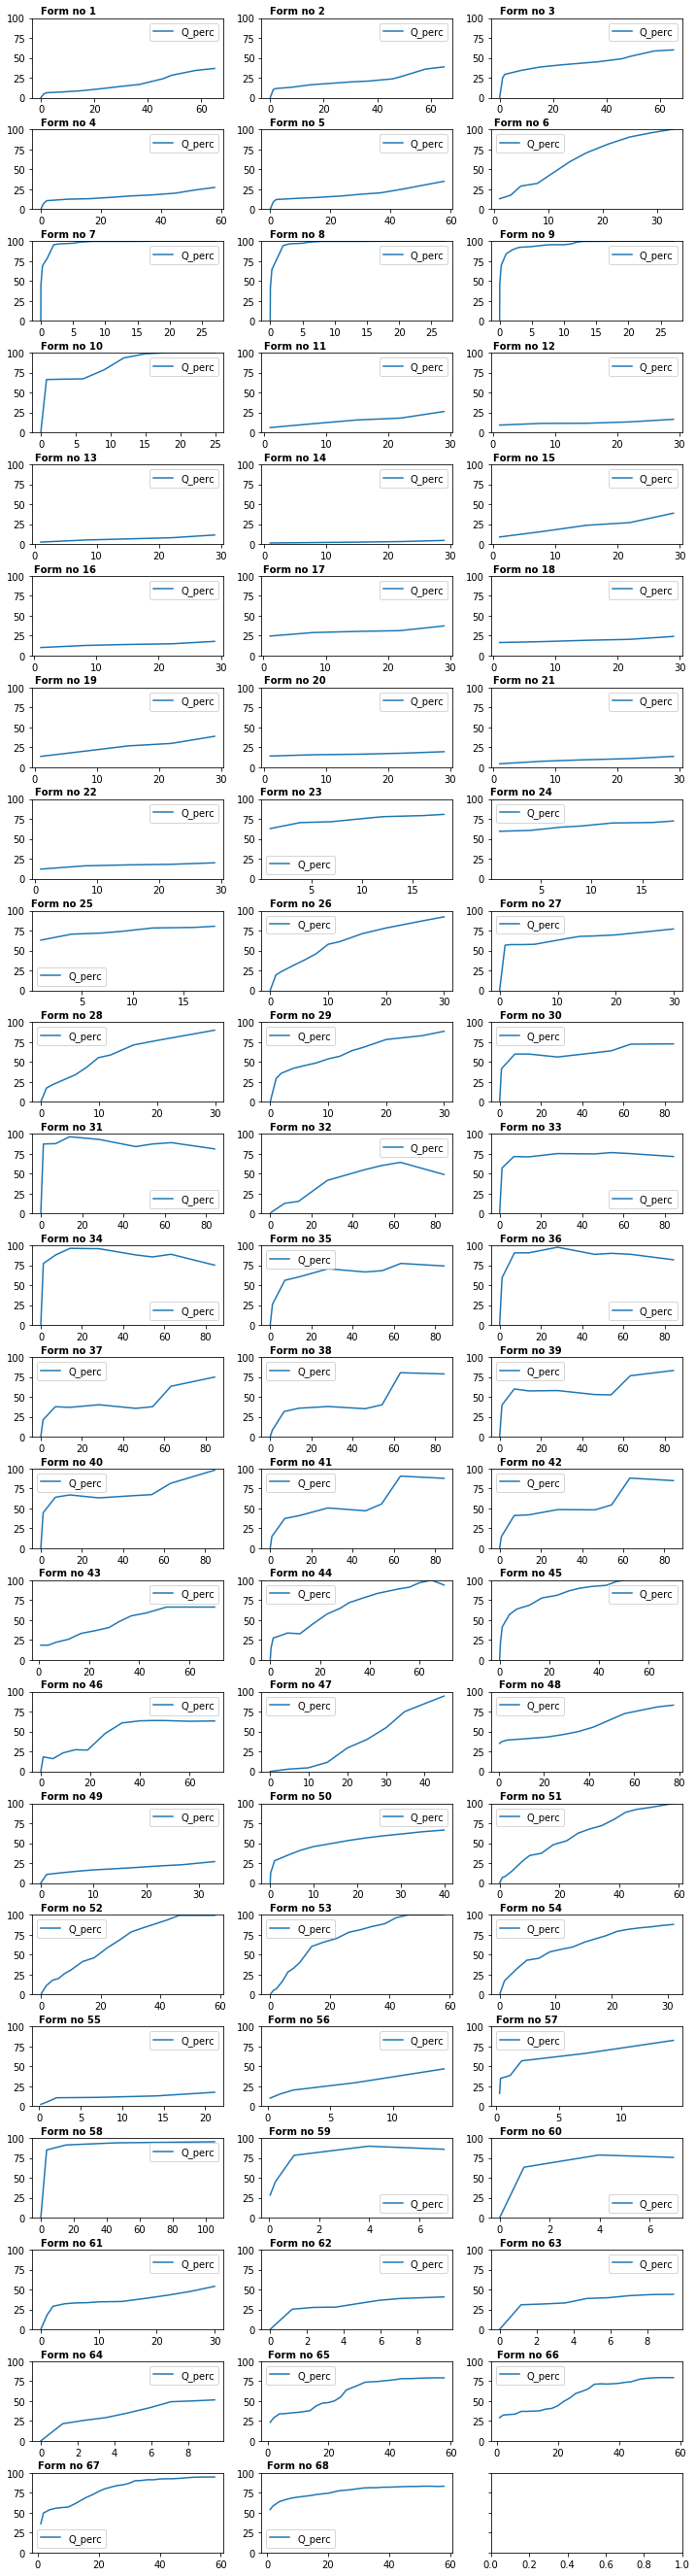

In [15]:
fig_data = data[['Formulation_no','Time_Days','Q_perc']]
fig_data = fig_data.groupby(['Formulation_no'])
fig, ax = plt.subplots(23,3, figsize=(12,48), sharex='all', sharey = 'all', squeeze = False)

for i in fig_data.groups:
    tmp_data = fig_data.get_group(i)
    plt.subplot(23,3,i)
    plt.subplots_adjust(hspace = 0.4)
    plt.ylim(0,100)
    plt.plot(tmp_data['Time_Days'],tmp_data['Q_perc'])
    plt.text(0, 105, str('Form no ' + str(i)), weight="bold")
    plt.legend()


### Feature selection

And now we will perform __feature selection__. The first step of feature selection will be to clear the folders (if there are some files remaining). This step is not necessary if you haven't been running h2o server in current directory. But if you are running a simulation once more or the process has crashed it is strongly recommended run below code (it will delete all files in the subdirectories).

In [16]:
# checking if my_10cv_FS_dir, my_10cv_orig_dir, my_pojo_or_mojo_FS, my_pojo_or_mojo_10cv, my_model_FS, my_model_10cv are empty if not delete content
print('Checking for non-empty dirs ...')
print('')
checking_list = [my_10cv_FS_dir, my_10cv_orig_dir, my_pojo_or_mojo_FS, my_pojo_or_mojo_10cv, my_model_FS, my_model_10cv, my_export_dir]
for checked_dir in checking_list:
    if len(os.listdir(checked_dir)) > 0:
        print('Removing files from ' + str(checked_dir) + ':')
        files_to_remove = glob.glob(str(checked_dir.joinpath(str(checked_dir)+'/*')))
        for f in files_to_remove:
            # print(str(f))
            if os.path.isfile(f):
                os.remove(f)
            else: # if error occurs #
                print("Error: %s file not found" %f)


Checking for non-empty dirs ...

Removing files from /home/kuba/Documents/NETS/Kaggle/NTU_workshops-Jupyter_notebook_NTU_h2o-master/10cv_FS:
Removing files from /home/kuba/Documents/NETS/Kaggle/NTU_workshops-Jupyter_notebook_NTU_h2o-master/10cv_orig:
Removing files from /home/kuba/Documents/NETS/Kaggle/NTU_workshops-Jupyter_notebook_NTU_h2o-master/pojo_or_mojo_FS:
Removing files from /home/kuba/Documents/NETS/Kaggle/NTU_workshops-Jupyter_notebook_NTU_h2o-master/model_FS:
Removing files from /home/kuba/Documents/NETS/Kaggle/NTU_workshops-Jupyter_notebook_NTU_h2o-master/model_10cv:
Removing files from /home/kuba/Documents/NETS/Kaggle/NTU_workshops-Jupyter_notebook_NTU_h2o-master/export:
Error: /home/kuba/Documents/NETS/Kaggle/NTU_workshops-Jupyter_notebook_NTU_h2o-master/export/h2ologs file not found


Prior to feature selection we have to define our inputs (`X`) and output (`y`), keeping in mind the MISO (multiple input single output) format of the data. So we drop 1st column (`groups`) which contains indicies of our formulations (dissolution profiles) and the last column which is our output.

In [15]:
ncols = data.shape[1]-1
nrows = data.shape[0]

X = data.drop(data.columns[[0,ncols]], axis=1)
y = data[data.columns[ncols]]

# needed to make cv by groups - first column contains indicies!
groups = data[data.columns[[index_column - 1]]]

In next step we start feature selection for a short period of time (30 seconds set in the option + about 2 seconds in this example) few times (6 times in this example) in order to sample the data splits and random seeds of the calculations.  
In h2o we have two options for hyperparameters search:
  1. Cartesian Grid (Hyperparameter) Search 
  2. Random Hyperparameter Search
According to h2o docs (http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#random-grid-search-parameters), AutoML performs Random Search of hyperparameters over a variety of H2O algorithms. It is claimed that this is more efficient and time-saving way of finding the best possible solution in a resonable amount of time.  
So, in gerenal what we want to achievie here is to randomly search for starting parameters of random hyperparameter search with random split of data set.

In [18]:
# Define FS_loops counter
no_FS_loops = 1

# the counter is set from 1, therefore = my_FS_loops + 1
while no_FS_loops < (my_FS_loops + 1): 

    # split on train - test dataset by group 'Formulation no' - this is for Feature Selection
    tmp_train_inds, tmp_test_inds = next(GroupShuffleSplit(n_splits=1, train_size=0.7, test_size=0.3).split(X, groups=groups))
    tmp_X_train, tmp_X_test, tmp_y_train, tmp_y_test = X.iloc[tmp_train_inds], X.iloc[tmp_test_inds], y.iloc[tmp_train_inds], y.iloc[tmp_test_inds]

    # Write splits on disk
    tmp_train_set = pd.concat([tmp_X_train, tmp_y_train], axis=1)
    tmp_test_set = pd.concat([tmp_X_test, tmp_y_test], axis=1)

    tmp_y_idx = tmp_train_set.columns[tmp_train_set.shape[1]-1]

    tmp_training_frame = h2o.H2OFrame(tmp_train_set)
    tmp_testing_frame = h2o.H2OFrame(tmp_test_set)

    # print out no of loop
    print('\n' + 'Starting FS loop no: ' + str(no_FS_loops) + '\n')
    tmp_my_random_seed_FS = random.randint(1,100000000)
    print('Temp random seed: ' + str(tmp_my_random_seed_FS) + '\n')

    tmp_aml_name = 'A' + random_key_generator(15)

    # autoML settings
    tmp_FS_model = H2OAutoML(max_runtime_secs = FS_h2o_max_runtime_secs,
                             seed = tmp_my_random_seed_FS,
                             project_name = tmp_aml_name,
                             export_checkpoints_dir = str(my_export_dir),
                             keep_cross_validation_models = my_keep_cross_validation_models,
                             keep_cross_validation_predictions = my_keep_cross_validation_predictions,
                             keep_cross_validation_fold_assignment = my_keep_cross_validation_fold_assignment,
                             verbosity = 'info',
                             sort_metric = 'RMSE')

    # train model for FS
    tmp_FS_model.train(y = tmp_y_idx, training_frame = tmp_training_frame, leaderboard_frame = tmp_testing_frame)

    # write first model rmse metrics
    if no_FS_loops is 1:
        tmp_FS_rmse = tmp_FS_model.leader.model_performance(tmp_testing_frame)['RMSE']
        aml_name = tmp_aml_name
        my_random_seed_FS = tmp_my_random_seed_FS

    # print out RMSE for the model
    print('\n' + 'RMSE for FS loop no: ' + str(no_FS_loops) + ' is ' + str(tmp_FS_model.leader.model_performance(tmp_testing_frame)['RMSE']) + '\n')

    # if new tmp_FS_model has better performance overwrite it to aml
    if tmp_FS_model.leader.model_performance(tmp_testing_frame)['RMSE'] < tmp_FS_rmse:

        # overwrite rmse for the tmp_FS_model - the leader
        tmp_FS_rmse = tmp_FS_model.leader.model_performance(tmp_testing_frame)['RMSE']

        #generate an unique file name based on the id and record
        file_name_train = str(core_filename)+"_h2o_train_for_FS"+".txt"
        file_name_test = str(core_filename)+"_h2o_test_for_FS"+".txt"

        tmp_train_set.to_csv(file_name_train, index=False, sep="\t")
        tmp_test_set.to_csv(file_name_test, index = False, sep="\t")

        y_idx = tmp_y_idx

        training_frame = tmp_training_frame
        testing_frame = tmp_testing_frame

        my_random_seed_FS = tmp_my_random_seed_FS
        aml_name = tmp_aml_name

        print('Current best aml name: ' + str(aml_name))
        print('Current best seed: ' + str(my_random_seed_FS) + '\n')

        # if new tmp_FS_model RMSE is lower or equal has better performance overwrite it to aml
        if tmp_FS_model.leader.model_performance(tmp_testing_frame)['RMSE'] <= rmse_fs_short_loop_threshold:

            print('\n' + 'Performance of obtained model is better than set threshold: ' + '\n')
            print('Threshold was set to: ' + str(rmse_fs_short_loop_threshold) + '\n')
            print('Performance of obtained model is: ' + str(tmp_FS_rmse) + '\n')
            print('Breaking the short FS loop')

            # Making no_FS_loops equal to my_FS_loops to break the while loop
            no_FS_loops = my_FS_loops 


    # FS_loop counter +1
    no_FS_loops += 1

# Once again perform FS on 'the best' train / test dataset, but this time for much longer

print('\n' + 'Used best aml name: ' + str(aml_name))
print('Used best seed: ' + str(my_random_seed_FS) + '\n')

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%

Starting FS loop no: 1

Temp random seed: 80785794

AutoML progress: |
11:09:21.599: Project: A903qkGuzo8AGU3z
11:09:21.599: AutoML job created: 2020.01.08 11:09:21.597
11:09:21.600: Build control seed: 80785794
11:09:21.601: training frame: Frame key: automl_training_Key_Frame__upload_913f8c82c95374be2f5eca2b55f7412c.hex    cols: 301    rows: 496  chunks: 1    size: 308220  checksum: -7777425329336462008
11:09:21.601: validation frame: NULL
11:09:21.601: leaderboard frame: Frame key: Key_Frame__upload_b63a38690c5a679675479a3a3d642f9.hex    cols: 301    rows: 249  chunks: 1    size: 118288  checksum: 2280335449307582974
11:09:21.601: blending frame: NULL
11:09:21.601: response column: Q_perc
11:09:21.601: fold column: null
11:09:21.602: weights column: null
11:09:21.652: Setting stopping tolerance adaptively based on the trai

### The actual feature selection
Now we will once again perform FS on 'the best' train / test data set, but this time for much longer.  
Be advised that we have kept the best possible split of data (`training_frame / testing_frame`) and we have also preserved the seed `my_random_seed_FS`. 

In [19]:
# autoML settings
aml = H2OAutoML(max_runtime_secs = FS_h2o_max_runtime_secs_2nd_time,
                seed = my_random_seed_FS,
                project_name = aml_name,
                export_checkpoints_dir = str(my_export_dir),
                keep_cross_validation_models = my_keep_cross_validation_models,
                keep_cross_validation_predictions = my_keep_cross_validation_predictions,
                keep_cross_validation_fold_assignment = my_keep_cross_validation_fold_assignment,
                verbosity = 'info',
                sort_metric = 'RMSE')

# train model for FS
aml.train(y = y_idx, training_frame = training_frame, leaderboard_frame = testing_frame)

AutoML progress: |
11:11:48.833: Project: AmzWNrgZLtNOqRJ9
11:11:48.833: AutoML job created: 2020.01.08 11:11:48.833
11:11:48.833: Build control seed: 34619835
11:11:48.833: training frame: Frame key: automl_training_Key_Frame__upload_8a8787bd98a810a09a624edb6a914f6b.hex    cols: 301    rows: 508  chunks: 1    size: 314934  checksum: 5642246736315821054
11:11:48.833: validation frame: NULL
11:11:48.834: leaderboard frame: Frame key: Key_Frame__upload_81aba58dc6e833149a0dc43c98734abc.hex    cols: 301    rows: 237  chunks: 1    size: 111910  checksum: 722892657046404934
11:11:48.834: blending frame: NULL
11:11:48.834: response column: Q_perc
11:11:48.834: fold column: null
11:11:48.834: weights column: null
11:11:48.834: Setting stopping tolerance adaptively based on the training frame: 0.04436782547080569
11:11:48.835: AutoML build started: 2020.01.08 11:11:48.835

█████
11:12:26.868: AutoML: starting GLM hyperparameter search

██████
11:12:42.905: New leader: GBM_2_AutoML_20200108_1111

Saving feature selection models ...

In [20]:
# saving model
my_model_FS_path = h2o.save_model(aml.leader, path = './model_FS')

print('')
print('Final model of feature selection is located at: ')
print(str(my_model_FS_path))
print('')

# Download POJO or MOJO
if save_pojo_or_mojo is True:
    if aml.leader.have_pojo is True:
        aml.leader.download_pojo(get_genmodel_jar = True, path = './pojo_or_mojo_FS')
    if aml.leader.have_mojo is True:
        aml.leader.download_mojo(get_genmodel_jar = True, path = './pojo_or_mojo_FS')



Final model of feature selection is located at: 
/home/kuba/Documents/NETS/Kaggle/NTU_workshops-Jupyter_notebook_NTU_h2o-master/model_FS/StackedEnsemble_BestOfFamily_AutoML_20200108_111148



After training we can check the performance of the best 10 models:

In [21]:
# get leader model key
model_key = aml.leader.key

lb = aml.leaderboard
lbdf = lb.as_data_frame()

print("\n","Leaderboard (10 best models): ")
lbdf.head(n=10)


 Leaderboard (10 best models): 


model_id  mean_residual_deviance  \
0  StackedEnsemble_BestOfFamily_AutoML_20200108_1...              186.194795   
1                       GBM_2_AutoML_20200108_111148              187.803296   
2  StackedEnsemble_BestOfFamily_AutoML_20200108_1...              196.743319   
3   StackedEnsemble_AllModels_AutoML_20200108_111100              197.075684   
4                   XGBoost_1_AutoML_20200108_111148              202.324296   
5                   XGBoost_1_AutoML_20200108_111100              202.324296   
6          GBM_grid_1_AutoML_20200108_111148_model_1              211.124424   
7                       GBM_3_AutoML_20200108_111148              213.504598   
8                   XGBoost_2_AutoML_20200108_111100              215.909804   
9                   XGBoost_2_AutoML_20200108_111148              215.909804   

        rmse         mse        mae  rmsle  
0  13.645321  186.194795  10.432065    NaN  
1  13.704134  187.803296  10.859574    NaN  
2  14.026522  196.743319  10.633434    NaN  
3  14.038365  197.075684  10.714520    NaN  
4  14.224075  202.324296  10.842506    NaN  
5  14.224075  202.324296  10.842506    NaN  
6  14.530121  211.124424  11.352411    NaN  
7  14.611797  213.504598  11.403816    NaN  
8  14.693870  215.909804  11.692353    NaN  
9  14.693870  215.909804  11.692353    NaN

### Postprocessing of feature selection results
First possibility is that the yielded model consisted of 'StackedEnsemble'


Models used in feature selection:
GBM_2_AutoML_20200108_111148
XGBoost_1_AutoML_20200108_111148
DRF_1_AutoML_20200108_111100
XRT_1_AutoML_20200108_111148
DeepLearning_grid_1_AutoML_20200108_111148_model_1
GLM_grid_1_AutoML_20200108_111148_model_1

Time_Days                     1.000000
Mean_part_size                0.156810
Prod_method                   0.136355
Encaps_rate                   0.103272
PVA_conc_inner_phase          0.083113
PLGA_conc                     0.081633
PVA_Mw                        0.070228
Hyper_wiener_index            0.050122
PLGA_Mw                       0.041929
Inner_phase_volume            0.038025
S_no                          0.022700
PLGA_visc                     0.022529
pH_0_logd                     0.022147
diss_add_conc                 0.017366
C_no                          0.015981
PLGA_to_Placticizer           0.015827
pH_1_logd                     0.015028
diss_pH                       0.013676
PVA_conc_outer_phase          0.013302
Dreiding_e

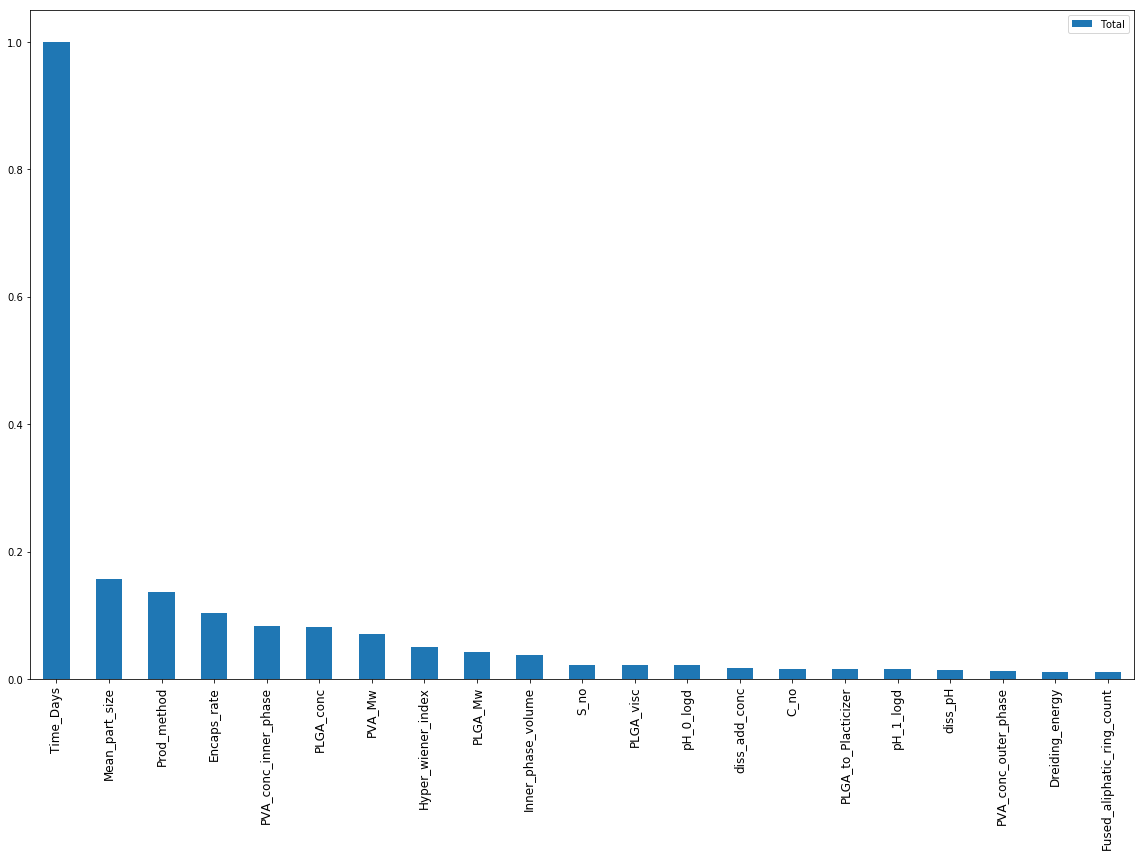

In [22]:
if ("StackedEnsemble" in model_key) is True:
    model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

    # get the best model key
    m = h2o.get_model(model_ids[0])

    # get the metalearner model
    meta = h2o.get_model(m.metalearner()['name'])

    # get varimp_df from metalearner
    if ('glm' in meta.algo) is True:
        varimp_df = pd.DataFrame.from_dict((meta.coef()), orient = 'index')
        varimp_df = varimp_df[1:] # omit Intercept
    else:
        varimp_df = pd.DataFrame(meta.varimp())

    model_list = []

    for model in m.params['base_models']['actual']:
        model_list.append(model['name'])

    print('')
    print('Models used in feature selection:')
    print(*model_list, sep='\n')
    print('')

    # create two dictionaries for storing variable importance and rmse
    var_imp_models = dict([(key, []) for key in model_list])
    rmse_df = dict([(key, []) for key in model_list])


    # get variable importance and rmse from base learners
    for model in model_list:
        tmp_model = h2o.get_model(str(model))

        # check if tmp_model has varimp()
        if tmp_model.varimp() is None:
            print(str(model))
            del var_imp_models[str(model)]
        else:
            # check if tmp_model is glm - it has no varimp() but coef()
            if ('glm' in tmp_model.algo) is True:
                tmp_var_imp = pd.DataFrame.from_dict(tmp_model.coef(), orient = 'index').rename(columns={0:'scaled_importance'})
                tmp_var_imp = tmp_var_imp[1:] # omit Intercept
                tmp_var_imp.insert(loc = 0, column = 'variable', value = tmp_var_imp.index) # reset index of rows into column
            else:
                tmp_var_imp = tmp_model.varimp(use_pandas=True).iloc[:,[0,2]]

            tmp_rmse = tmp_model.rmse()
            var_imp_models[str(model)].append(tmp_var_imp)
            rmse_df[str(model)].append(tmp_rmse)

    if original_scale is False:
        rmse_df = pd.DataFrame(rmse_df.values())
        rmse_sum = rmse_df.sum()[0]
        rmse_scale = rmse_sum / rmse_df

        x = rmse_scale.values #returns a numpy array
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        rmse_scale = pd.DataFrame(x_scaled)
        rmse_scale = pd.DataFrame(data=rmse_scale.values,index=model_list)

        for idx in rmse_scale.iterrows():
            var_imp_models[str(idx[0])][0]['scaled_importance'] = var_imp_models[str(idx[0])][0].values[0:,1] * idx[1].values

    elif original_scale is True:
        meta_scale = varimp_df
        for idx in meta_scale.iterrows():
            if ('glm' in meta.algo) is True:
                var_imp_models[str(idx[0])][0]['scaled_importance'] = var_imp_models[str(idx[0])][0].values[0:,1] * float(idx[1])
            else:
                var_imp_models[str(idx[1][0])][0]['scaled_importance'] = var_imp_models[str(idx[1][0])][0]['scaled_importance'] * idx[1][3]

    # new dataframe init     
    scaled_var_imp_df = pd.DataFrame()

    for idx in var_imp_models.keys():
        df_tmp = var_imp_models[str(idx)][0]['scaled_importance']
        df_tmp.index = var_imp_models[str(idx)][0]['variable']
        scaled_var_imp_df = pd.concat([scaled_var_imp_df, df_tmp], axis =1, sort = False)

    # sum rows by index, NaNs are consdered as zeros
    #Total sum per row: 
    scaled_var_imp_df.loc[:,'Total'] = scaled_var_imp_df.sum(axis=1)
    
    # Scaled from range 0 - 1
    scaled_var_imp_df.loc[:,'Total']=(scaled_var_imp_df['Total']-scaled_var_imp_df['Total'].min())/(scaled_var_imp_df['Total'].max()-scaled_var_imp_df['Total'].min())

    # Drop variables by a fs_threshold condition
    scaled_var_imp_df = scaled_var_imp_df[scaled_var_imp_df.Total > fs_threshold]

    # Sort by 'Total' values
    scaled_var_imp_df_sorted = scaled_var_imp_df.sort_values(by=['Total'], ascending = False)
    
    # Print out the table
    print(scaled_var_imp_df_sorted['Total'])

    # Plot and save bar chart
    plt.rcParams['xtick.labelsize'] = 12
    ax = scaled_var_imp_df_sorted.plot.bar(y='Total', rot=90, figsize=(16,12))
    plt.tight_layout()
    plt.savefig('FS_result_h2o.pdf', format='pdf', dpi=1200)


If the model is not a 'StackedEnsemble', here will go the feature selection output

In [23]:
if ("StackedEnsemble" in model_key) is False:
    # get varimp_df
    varimp_df = aml.leader.varimp(use_pandas = True).iloc[:,[0,2]]
    scaled_var_imp_df = varimp_df

    # Drop variables by a fs_threshold condition
    scaled_var_imp_df = scaled_var_imp_df[scaled_var_imp_df.scaled_importance > fs_threshold]

    # Sort by 'scaled_importance' values
    scaled_var_imp_df_sorted = scaled_var_imp_df.sort_values(by=['scaled_importance'], ascending = False)
    
    # Print out the table
    print(scaled_var_imp_df_sorted)

    # Plot and save bar chart
    plt.rcParams['xtick.labelsize'] = 8
    ax = scaled_var_imp_df_sorted.plot.bar(y='scaled_importance', x = 'variable', rot=90, figsize=(16,12))
    plt.tight_layout()
    plt.savefig('FS_result_h2o.pdf', format='pdf', dpi=1200)



Ok, this was the first step in our example - feature selection. Now we will move on to next step - modeling according to 10-fold cross validation (10-cv).  
To sum up what we have already done:  
1. Prepared h2o server for calculations (imports, parameters, etc.).
2. Uploaded data set.
3. Performed feature selection (if final model was StackedEnsemble we have aggregated the results).
4. Reduced the original data set to 21 inputs in a matter of minutes.


During the next step we will perform 10-fold split on training - testing pairs. It is important to use formulation indicies as our groups for splitting. In this way, we will be sure that whole formulation is in training or testing data set. Moreover, the data pairs are saved in two folders:
  1. Original data sets are stored in `10cv_orig`
  2. Reduced data sets according to feature ranking are stored in `10cv_FS`  
Please be advised, that in case of `StackedEnsemble` models a threshold is assigned to a models' aggregated feature importance. Moreover, if you refer to the `inlcude_features`, you can manually incorporate features in the final k-fold cv data sets.

In [24]:
# Perform k-fold cv 
# split on train - test dataset by group - according to no_folds
gkf = GroupKFold(n_splits=no_folds)
cv_fold = 0

for train_index, test_index in gkf.split(X, y, groups=groups):
    cv_fold += 1
    print("CV fold: ", cv_fold)
    # print("Train Index: ", train_index)
    # print("Test Index: ", test_index, "\n")
    #print('Groups: ', groups,'\n')

    trainX_data = X.loc[train_index]
    trainy_data = y.loc[train_index]

    testX_data = X.loc[test_index]
    testy_data = y.loc[test_index]

    # Save original 10cv folds with all features
    train_set = pd.concat([trainX_data, trainy_data, groups], axis=1, join='inner')
    test_set = pd.concat([testX_data, testy_data, groups], axis=1, join='inner')

    # generate a file name based on the id and record and save orig 10cv datasets
    file_name_train = "10cv_orig_" + str(core_filename) + "_no" + str(cv_fold) + ".txt"
    file_name_test = "t-10cv_orig_" + str(core_filename) + "_no" + str(cv_fold) + ".txt"

    train_set.to_csv(r'./10cv_orig/' + file_name_train, index=False, sep="\t")
    test_set.to_csv(r'./10cv_orig/' + file_name_test, index=False, sep="\t")
    # print(model_key)
    if ('StackedEnsemble' in model_key) is True:
         # Remove features that score below threshold
         trainX_data = trainX_data[scaled_var_imp_df.index.tolist()]
         # trainy_data stays the same
         testX_data = testX_data[scaled_var_imp_df.index.tolist()]
    elif ('StackedEnsemble' in model_key) is False:
        # Remove features that score below threshold
        trainX_data = trainX_data[scaled_var_imp_df['variable']]
        # trainy_data stays the same
        testX_data = testX_data[scaled_var_imp_df['variable']]
        # testy_data stays the same

    #functionality to manually add features, eg. 'Time_min' in dissolution profiles
    if len(include_features) > 0:
        include_features_df_train = X.loc[train_index]
        include_features_df_test = X.loc[test_index]
        include_features_df_train = include_features_df_train[include_features]
        include_features_df_test = include_features_df_test[include_features]

        trainX_data = pd.concat([include_features_df_train, trainX_data], axis = 1)
        testX_data = pd.concat([include_features_df_test, testX_data], axis = 1)
        trainX_data = trainX_data.loc[:,~trainX_data.columns.duplicated()]
        testX_data = testX_data.loc[:,~testX_data.columns.duplicated()]

    train_set = pd.concat([trainX_data, trainy_data], axis=1)
    test_set = pd.concat([testX_data, testy_data], axis=1)

    ncols=train_set.shape[1]-1
    nrows=train_set.shape[0]

    print('nrows for' + aml2_name + ' project train dataset = ',nrows)
    print('ncols for train dataset = ',ncols)

    # save datasets after feature selection
    file_name_train = "10cv_" + str(core_filename)+ "_FS_to_" + str(ncols) + "_in" +"_no"+str(cv_fold)+".txt"
    file_name_test = "t-10cv_"+str(core_filename)+ "_FS_to_" + str(ncols) + "_in" +"_no"+str(cv_fold)+".txt"

    train_set.to_csv(r'./10cv_FS/' + file_name_train, index=False, sep="\t")
    test_set.to_csv(r'./10cv_FS/' + file_name_test, index = False, sep="\t")
# split loop end


CV fold:  1
nrows forAYjSZIwYVo0q04kd project train dataset =  668
ncols for train dataset =  21
CV fold:  2
nrows forAYjSZIwYVo0q04kd project train dataset =  670
ncols for train dataset =  21
CV fold:  3
nrows forAYjSZIwYVo0q04kd project train dataset =  672
ncols for train dataset =  21
CV fold:  4
nrows forAYjSZIwYVo0q04kd project train dataset =  672
ncols for train dataset =  21
CV fold:  5
nrows forAYjSZIwYVo0q04kd project train dataset =  670
ncols for train dataset =  21
CV fold:  6
nrows forAYjSZIwYVo0q04kd project train dataset =  671
ncols for train dataset =  21
CV fold:  7
nrows forAYjSZIwYVo0q04kd project train dataset =  671
ncols for train dataset =  21
CV fold:  8
nrows forAYjSZIwYVo0q04kd project train dataset =  671
ncols for train dataset =  21
CV fold:  9
nrows forAYjSZIwYVo0q04kd project train dataset =  672
ncols for train dataset =  21
CV fold:  10
nrows forAYjSZIwYVo0q04kd project train dataset =  668
ncols for train dataset =  21


Before training the AutoML models, we read the testing data sets and we construct a set in which individual folds are defined based on the file names.

In [11]:
# Load testing data in a loop and make folds based on them 
# 1) List all files with pattern 't-*.txt' in ./10cv_orig
all_filenames = [i for i in glob.glob('./10cv_FS/t-*.txt')]
# 2) Sort list of filenames from 1 to 10
all_filenames.sort(key = lambda x: int(x.split('_no')[1].split('.')[0]))
# 3) read all files in a list into a data_frame and make indicies for each t-file
df_new_approach = pd.concat([pd.read_csv(all_filenames[index], header = [0], sep = '\t', engine = 'python').assign(Fold_no=index+1) for index in range(len(all_filenames))])

# index of the output column
y_idx = df_new_approach.columns[df_new_approach.shape[1]-2]
training_frame = h2o.H2OFrame(df_new_approach)

# assign fold column name
assignment_type = 'Fold_no'

Parse progress: |█████████████████████████████████████████████████████████| 100%


Now, let's run the model development, with a seed (`my_seed_FS`) identical as in feature selection step. 

In [26]:
# set new AutoML options
aml_10cv = H2OAutoML(max_runtime_secs = h2o_max_runtime_secs_10cv,
                     seed = my_seed_FS,
                     project_name = aml2_name,
                     nfolds = no_folds,
                     export_checkpoints_dir = str(my_export_dir),
                     keep_cross_validation_predictions = my_keep_cross_validation_predictions,
                     keep_cross_validation_models = my_keep_cross_validation_models,
                     keep_cross_validation_fold_assignment = my_keep_cross_validation_fold_assignment,
                     verbosity = 'info',
                     sort_metric = 'RMSE')

# train AutoML with fold_column!
aml_10cv.train(y = y_idx, training_frame = training_frame, fold_column = assignment_type)


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |
11:21:01.631: Project: AYjSZIwYVo0q04kd
11:21:01.631: AutoML job created: 2020.01.08 11:21:01.631
11:21:01.631: Custom fold column, Fold_no, will be used. nfolds value will be ignored.
11:21:01.631: Build control seed: 1
11:21:01.631: training frame: Frame key: automl_training_Key_Frame__upload_90baabb7c5db07a26cf851796aca4c9a.hex    cols: 23    rows: 745  chunks: 1    size: 42425  checksum: -7193066533413673517
11:21:01.631: validation frame: NULL
11:21:01.631: leaderboard frame: NULL
11:21:01.631: blending frame: NULL
11:21:01.631: response column: Q_perc
11:21:01.632: fold column: [745,1.0/5.495302013422814/10.0,  813  B, {/127.0.0.1:62207:0:}]
11:21:01.632: weights column: null
11:21:01.634: Setting stopping tolerance adaptively based on the training frame: 0.03663716527236558
11:21:01.635: AutoML build started: 2020.01.08 11:21:01.635

██
11:21:13.644: New leader: XGBoost_1_AutoML_2

We have trained an autoML model. Let's look deeper into it. As a starter we can check how other models performed. Let's check leaderboard.

In [37]:
aml_10cv.leaderboard

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 StackedEnsemble_BestOfFamily_AutoML_20200108_112101 198.421 14.0862 198.421 10.4154 nan 
 StackedEnsemble_AllModels_AutoML_20200108_112101 225.61 15.0203 225.61 11.7797 0.727036 
 GBM_grid_1_AutoML_20200108_112101_model_20 226.953 15.0649 226.953 11.5641 nan 
 GBM_grid_1_AutoML_20200108_112101_model_18 231.744 15.2231 231.744 11.6241 nan 
 GBM_grid_1_AutoML_20200108_112101_model_32 231.8 15.225 231.8 11.5251 nan 
 XGBoost_1_AutoML_20200108_112101 233.901 15.2938 233.901 11.4316 nan 
 GBM_grid_1_AutoML_20200108_112101_model_41 233.928 15.2947 233.928 11.2395 nan 
 GBM_4_AutoML_20200108_112101 235.926 15.3599 235.926 11.3615 nan 
 XGBoost_3_AutoML_20200108_112101 238.565 15.4456 238.565 11.8152 nan 
 GBM_grid_1_AutoML_20200108_112101_model_25 240.101 15.4952 240.101 11.2812 nan

and now let's check the leader

In [38]:
aml_10cv.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_AutoML_20200108_112101

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 42.35338701374798
RMSE: 6.507947987941205
MAE: 4.825235685795378
RMSLE: NaN
R^2: 0.9551051358314264
Mean Residual Deviance: 42.35338701374798
Null degrees of freedom: 744
Residual degrees of freedom: 741
Null deviance: 702825.9002358188
Residual deviance: 31553.273325242244
AIC: 4915.024468460882

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 198.4206539573441
RMSE: 14.086186636465673
MAE: 10.41538942238146
RMSLE: NaN
R^2: 0.7896728234565316
Mean Residual Deviance: 198.4206539573441
Null degrees of freedom: 744
Residual degrees of freedom: 740
Null deviance: 712289.7940597414
Residual deviance: 147823.38719822135
AIC: 6067.558437044801


Ok, we have a model, now it is good to save the leader. In order to properly save a model in h2o we have to use its internal function `h2o.save_model()`. If we would save binary object through `pickle` it would write only the meta data.  
Below lines of code will also write Java objects (POJO or MOJO if available).

In [40]:
# save h2o model
print('Saving leader h2o model in ./model_10cv and ./test_external')
my_10cv_model_path = h2o.save_model(aml_10cv.leader, path = './model_10cv', force = True)

print('')
print('The final model afer k-fold cv is located at: ')
print(str(my_10cv_model_path))
print('')

h2o.save_model(aml_10cv.leader, path = './test_external', force = True)

# Download POJO or MOJO
if save_pojo_or_mojo is True:
    if aml_10cv.leader.have_pojo is True:
        aml_10cv.leader.download_pojo(get_genmodel_jar = True, path = './pojo_or_mojo_10cv')
    if aml_10cv.leader.have_mojo is True:
        aml_10cv.leader.download_mojo(get_genmodel_jar = True, path = './pojo_or_mojo_10cv')

Saving leader h2o model in ./model_10cv and ./test_external

The final model afer k-fold cv is located at: 
/home/kuba/Documents/NETS/Kaggle/NTU_workshops-Jupyter_notebook_NTU_h2o-master/model_10cv/StackedEnsemble_BestOfFamily_AutoML_20200108_112101



For `StackedEnsemble` models it is good to have all the constituents saved in one place together with the meta model. Lines of code below allow us to save the models and store cross validation results in `pred_obs` object.

In [31]:
# get the models id
model_ids = list(aml_10cv.leaderboard['model_id'].as_data_frame().iloc[:,0])
# get the best model
m = h2o.get_model(aml_10cv.leader.key)
print('Leader model: ')
print(m.key)


if ("StackedEnsemble" in aml_10cv.leader.key) is True:
    # get the metalearner name
    se_meta_model = h2o.get_model(m.metalearner()['name'])

    my_se_meta_model_path = h2o.save_model(se_meta_model, path = './model_10cv')
    print('')
    print('The meta model of the best model is located at: ')
    print(str(my_se_meta_model_path))
    print('')

    h2o_cv_data = se_meta_model.cross_validation_holdout_predictions()
    pred_obs = h2o_cv_data.cbind([training_frame[training_frame.col_names[len(training_frame.col_names)-2]],training_frame['Fold_no'], training_frame['Time_Days']])

    # get a list of models - save and print out
    model_list = []

    print('Saving constituents of the StackedEnsemble')
    for model in m.params['base_models']['actual']:
        model_list.append(model['name'])
        my_tmp_model_path = h2o.save_model(h2o.get_model(str(model['name'])), path = './model_10cv')
        print(str(my_tmp_model_path))

    print('Stacked Ensemble model contains: ')
    print(model_list)


if ("StackedEnsemble" in aml_10cv.leader.key) is False:
    h2o_cv_data = m.cross_validation_holdout_predictions()
    pred_obs = h2o_cv_data.cbind([training_frame[training_frame.col_names[len(training_frame.col_names)-2]], training_frame['Fold_no'], training_frame['Time_Days']])


Leader model: 
StackedEnsemble_BestOfFamily_AutoML_20200108_112101

The meta model of the best model is located at: 
/home/kuba/Documents/NETS/Kaggle/NTU_workshops-Jupyter_notebook_NTU_h2o-master/model_10cv/metalearner_AUTO_StackedEnsemble_BestOfFamily_AutoML_20200108_112101

Saving constituents of the StackedEnsemble
/home/kuba/Documents/NETS/Kaggle/NTU_workshops-Jupyter_notebook_NTU_h2o-master/model_10cv/GBM_grid_1_AutoML_20200108_112101_model_20
/home/kuba/Documents/NETS/Kaggle/NTU_workshops-Jupyter_notebook_NTU_h2o-master/model_10cv/XGBoost_1_AutoML_20200108_112101
/home/kuba/Documents/NETS/Kaggle/NTU_workshops-Jupyter_notebook_NTU_h2o-master/model_10cv/DeepLearning_grid_1_AutoML_20200108_112101_model_1
/home/kuba/Documents/NETS/Kaggle/NTU_workshops-Jupyter_notebook_NTU_h2o-master/model_10cv/DRF_1_AutoML_20200108_112101
/home/kuba/Documents/NETS/Kaggle/NTU_workshops-Jupyter_notebook_NTU_h2o-master/model_10cv/XRT_1_AutoML_20200108_112101
/home/kuba/Documents/NETS/Kaggle/NTU_workshop

In [108]:
# Get the formulation indicies after split to 10-cv folds
orig_10cv_filenames = [i for i in glob.glob('./10cv_orig/t-*.txt')]
# 2) Sort list of filenames from 1 to 10
orig_10cv_filenames.sort(key = lambda x: int(x.split('_no')[1].split('.')[0]))
# 3) read all files in a list into a data_frame and make indicies for each t-file
df_orig_10cv = pd.concat([pd.read_csv(orig_10cv_filenames[index], header = [0], sep = '\t', engine = 'python').assign(Fold_no=index+1) for index in range(len(orig_10cv_filenames))])

Let's see what was the model performance among formulations (this will be the training error - RMSE): 

In [112]:
tmp_data = df_orig_10cv.drop(['Q_perc'],axis = 1)
tmp_formulation = df_orig_10cv[['Formulation_no', 'Time_Days', 'Q_perc']]
tmp_data_h2o = h2o.H2OFrame(tmp_data)
tmp_predict = aml_10cv.predict(tmp_data_h2o)
tmp_predict = tmp_predict.as_data_frame(use_pandas = True)
tmp_formulation = tmp_formulation.assign(predict= pd.Series(tmp_predict['predict']).values)
df2 = tmp_formulation

Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


In [115]:
df2.head(24)

Formulation_no  Time_Days   Q_perc  predict_train
0                6      1.007   13.187      22.080214
1                6      3.022   17.582      31.837049
2                6      4.910   29.121      35.764895
3                6      7.932   32.418      45.087647
4                6     10.953   46.154      52.395388
5                6     13.975   59.890      62.097507
6                6     16.996   70.879      71.025871
7                6     21.025   81.868      76.352683
8                6     24.928   90.659      85.228844
9                6     29.083   96.154      89.421208
10               6     32.986  100.549      92.834489
11              22      0.883   12.113      14.854585
12              22      7.988   16.223      17.285424
13              22     14.987   17.414      18.329945
14              22     21.984   18.156      20.155898
15              22     28.987   20.021      22.278046
16              40      0.000    0.000       8.499734
17              40      1.148   44.628      43.161874
18              40      7.134   64.050      58.579496
19              40     14.109   66.942      61.159842
20              40     28.293   63.223      61.917292
21              40     45.849   66.116      64.215013
22              40     54.110   67.355      67.283471
23              40     63.179   81.405      79.479192

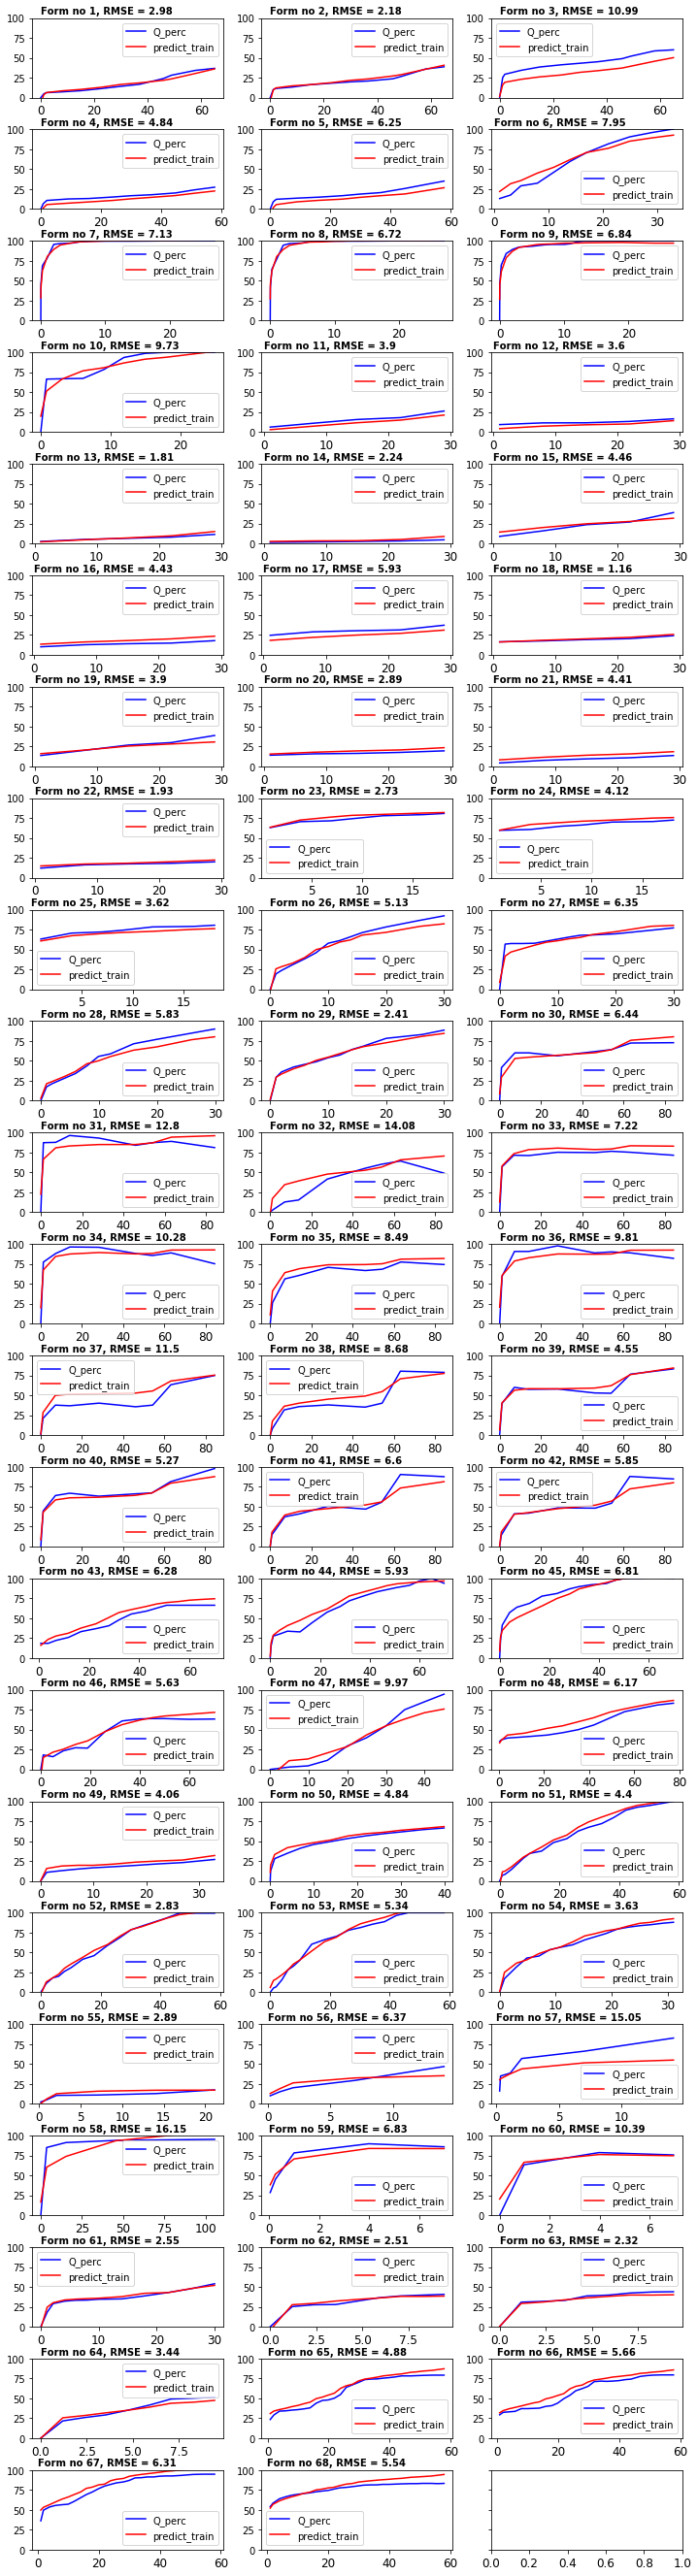

In [117]:
df2_grouped = df2.groupby(['Formulation_no'])
fig2, ax2 = plt.subplots(23,3, figsize=(12,48), sharex='all', sharey = 'all', squeeze = False)

for i in df2_grouped.groups:
    tmp_df = df2_grouped.get_group(i)
    rmse_tmp = sqrt(mean_squared_error(tmp_df['Q_perc'], tmp_df['predict']))
    plt.subplot(23,3,i)
    plt.subplots_adjust(hspace = 0.4)
    plt.ylim(0,100)
    plt.plot(tmp_df['Time_Days'],tmp_df['Q_perc'], color='blue')
    plt.plot(tmp_df['Time_Days'],tmp_df['predict'], color='red')
    plt.text(0, 105, str('Form no ' + str(i) + ', RMSE = ' + str(round(rmse_tmp,2))), weight="bold")
    plt.legend()
    

Now let's look at the 10-cv RMSE:

In [121]:
pred_obs_df = pred_obs.as_data_frame()
pred_obs_df = pred_obs_df.assign(Formulation_no= pd.Series(df_orig_10cv['Formulation_no']).values)
pred_obs_df = pred_obs_df.assign(Time_Days= pd.Series(df_orig_10cv['Time_Days']).values)

df3 = pred_obs_df
df3_grouped = df3.groupby(['Formulation_no'])

df3.head(24)

predict   Q_perc  Fold_no  Formulation_no  Time_Days
0   27.046440   13.187        1               6      1.007
1   37.201651   17.582        1               6      3.022
2   38.806804   29.121        1               6      4.910
3   44.867797   32.418        1               6      7.932
4   48.099435   46.154        1               6     10.953
5   51.717738   59.890        1               6     13.975
6   54.317948   70.879        1               6     16.996
7   56.256956   81.868        1               6     21.025
8   58.958139   90.659        1               6     24.928
9   60.021797   96.154        1               6     29.083
10  60.575408  100.549        1               6     32.986
11  11.908422   12.113        1              22      0.883
12  13.542444   16.223        1              22      7.988
13  14.715276   17.414        1              22     14.987
14  16.018434   18.156        1              22     21.984
15  18.373920   20.021        1              22     28.987
16   1.059168    0.000        1              40      0.000
17  42.633786   44.628        1              40      1.148
18  57.422340   64.050        1              40      7.134
19  57.391085   66.942        1              40     14.109
20  57.384680   63.223        1              40     28.293
21  57.792230   66.116        1              40     45.849
22  60.408383   67.355        1              40     54.110
23  71.916153   81.405        1              40     63.179

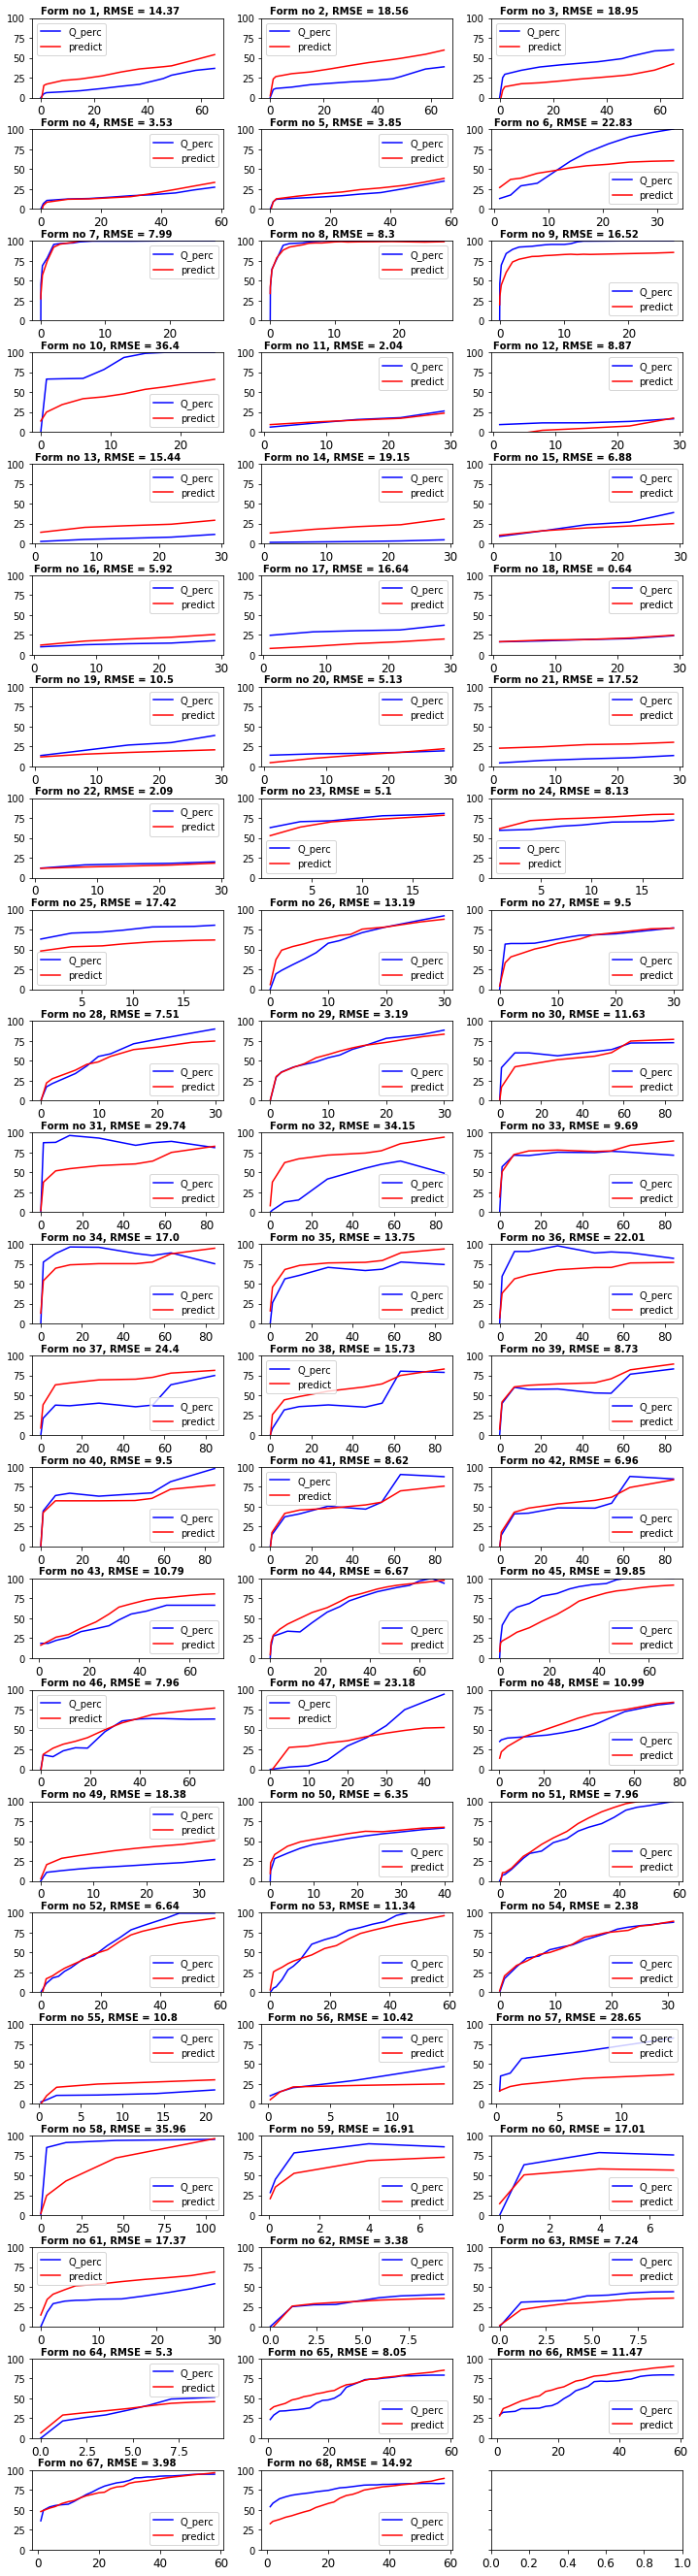

In [122]:
fig2, ax2 = plt.subplots(23,3, figsize=(12,48), sharex='all', sharey = 'all', squeeze = False)

for i in df3_grouped.groups:
    tmp_df = df3_grouped.get_group(i)
    rmse_tmp = sqrt(mean_squared_error(tmp_df['Q_perc'], tmp_df['predict']))
    plt.subplot(23,3,i)
    plt.subplots_adjust(hspace = 0.4)
    plt.ylim(0,100)
    plt.plot(tmp_df['Time_Days'], tmp_df['Q_perc'], color='blue')
    plt.plot(tmp_df['Time_Days'], tmp_df['predict'], color='red')
    plt.text(0, 105, str('Form no ' + str(i) + ', RMSE = ' + str(round(rmse_tmp,2))), weight="bold")
    plt.legend()

Well, this model is definitly not one of the best for generalization (RMSE ~ 14.1), but maybe we can draw some conclusions or even make hypotheses, based on the fact that it has fairly low learning error.

### Model explanation

It is believed that in the next few years, explaining the model behaviour (predictions) will become one of the most important activities performed by data engineers. On one hand, it would prevent model bias and help decision makers understand how to use our models in the right way. On the other hand, it would be required to provide evidence of how the models work and how to avoid mistakes in predictions (medcine / health).

SHAP is one of the popular Python libraries for model explainability. SHAP is an abbreviation for SHapley Additive exPlanation, which is based on a concept of so called 'Shapley values' in cooperative game theory developed by Lloyd Shapley. If we consider a round of a game, where a coalition of players cooperates, and obtains a certain overall score from the cooperation. The players contribution for the score is different. The problem to solve is how to assign the influence of individual players? The Shapley value provides the answer to this question as the definition is “average marginal contribution of a feature value over all possible coalitions.” In other words, Shapley values consider all possible predictions for an instance using all possible combinations of inputs. Because of this exhaustive approach, SHAP can guarantee properties like consistency and local accuracy.

![](img/shap_explain.png)

In this notebook we will be using SHAP package, but due to the exhaustive calculation process, we will load binary object of the Shapley values calculated earlier.

In order to use AutoML h2o model we need to write a wrapper class to provide a `predict()` function in format understood by `shap` library. We have written the code of the class `H2OPredWrapper` at the begining of the excercise. The code was adapted and re-written after Sean P Leary (https://github.com/SeanPLeary).

In this section we will:
  1. transform `training` H2OFrame to `pandas` data_frame,
  2. store the `features_names`
  3. extract the best model (or load)
  4. define a `wrapper` and `explainer`
  5. calculate Shapley values (or load pickle objects)
  6. explain the results (plots)
  

In [12]:
trainX = training_frame.as_data_frame()
feature_names = list(trainX.columns)

# We will load saved model rather than extract the best model
# h2o_bst_model = aml_10cv.leader
h2o_bst_model = h2o.load_model('./model_10cv/StackedEnsemble_BestOfFamily_AutoML_20200108_112101')

In [13]:
h2o_wrapper = H2OPredWrapper(h2o_bst_model,feature_names)

The next lines will be commented out, but if you will like to perform your own calculations, please uncomment them. For this data set the calculation of Shapley values took about 20 hours. We can modify the background data set which is used by `KernelExplainer` to determine the impact of a feature. Please be advised that in the example we have not used the whole data set. We can use `SamplingExplainer` instead of `KernelExplainer`, which is a good alternative if we want to use the whole data set. `SamplingExplainer`computes SHAP values under the assumption of feature independence ().  
After calcualtion of Shapley values, pickles were saved:

In [22]:
# This is the core code for Shapley values calculation
# h2o.no_progress()
explainer = shap.KernelExplainer(h2o_wrapper.predict, shap.kmeans(trainX, 50))
# It took about 20 hours to calculate
# shap_values = explainer.shap_values(trainX, l1_reg = 'aic')

Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


In [15]:
# pickle.dump(explainer, open("shap_explainer.p", "wb" ))
# pickle.dump(shap_values, open("shap_values.p", "wb" ))

Instead we will load pickles (binary objects)

In [24]:
# explainer = pickle.load(open("./shap_explainer.p", "rb"))
shap_values = pickle.load(open("./shap_values.p", "rb"))

In [25]:
# initialize js for SHAP
shap.initjs()

The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue. Let's visualize the tenth prediction's explanation

In [26]:
shap.force_plot(explainer.expected_value, shap_values[9,:], trainX.iloc[9,:])

We can also make summary explanations for an entire dataset. To do that SHAP takes all available explanations, rotate them 90 degrees, and then stack them horizontally. Therefore on the left drop-box we will have 'feature effects' (positive = red, negative = blue). The y-axis has our output scale (in this case Q[%]). The x-axis can be set by the values of features. For example if we would like to assess what was the effect of the mean particle size accross the recorded values on the dissolution we need to set x-axis drop-box to 'Mean_part_size' and the y-axis drop-box to the 'Mean particle size effects'. On the plot we can notice that in the range of 0 to 40µm the particle size feature slightly increases the dissolution (about 5% more). Whereas, when mean particle size is more than 40µm we can suspect that the dissolution will be lower than expected (about 5-15% less).

In [27]:
shap.force_plot(explainer.expected_value, shap_values, trainX)

Shapley values represent a feature's responsibility for a change in the model output. If we would like to go deeper into explaining how a single feature ('Mean_part_size') effects the output of the model ('Q_perc') we can plot the SHAP value of that feature vs. the value of the feature for all the examples in a dataset. The plot below depicts the change in predicted dissolution [%] as mean particle size changes. Vertical dispersion at a single value of mean particle size represents interaction effects with other features. To help reveal these interactions `dependence_plot` automatically selects another feature for coloring (we can also select other features). In this case coloring by PLGA_visc (viscosity of 2% PLGA solution in water - as stated by the manufacturer) highlights that the mean particle size has less impact on dissolution for microparticles which were produced with thinner PLGA.

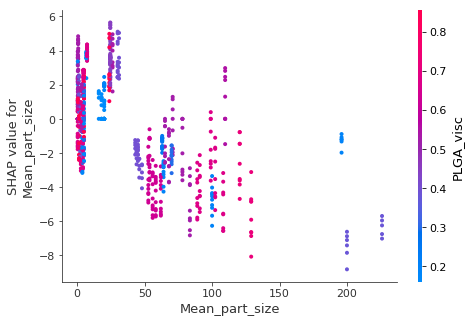

In [28]:
shap.dependence_plot('Mean_part_size', shap_values, trainX, interaction_index='PLGA_visc')

Moreover, if we plot Production method, which were four:  
1. = water/oil/water (W/O/W) double emulsion solvent evaporation
2. = solid/oil/water (S/O/W) double emulsion solvent evaporation 
3. = solid/oil/oil (S/O/O) double emulsion solvent evaporation
4. = spraying solid/oil (S/O)
and color by Mean particle size, we can observe that the PLGA obtained by the W/O/W methods tend to have lower expected dissolution that is inverse proportional to mean particle size. On the contrary, we have spray-dried PLGA which are less affected by the mean perticle size.  

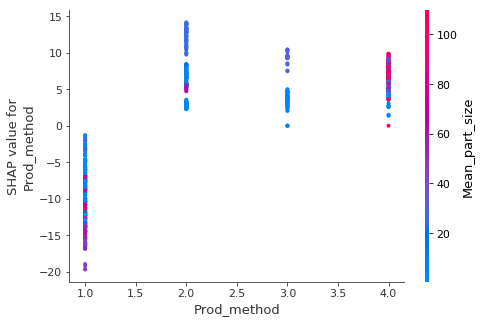

In [29]:
shap.dependence_plot('Prod_method', shap_values, trainX, interaction_index='Mean_part_size')

To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample. The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low). This reveals for example that a low encapsulation rate (% of API loaded into the microparticles) or low mean particle size (smaller microparticles) increases the predicted dissolution.

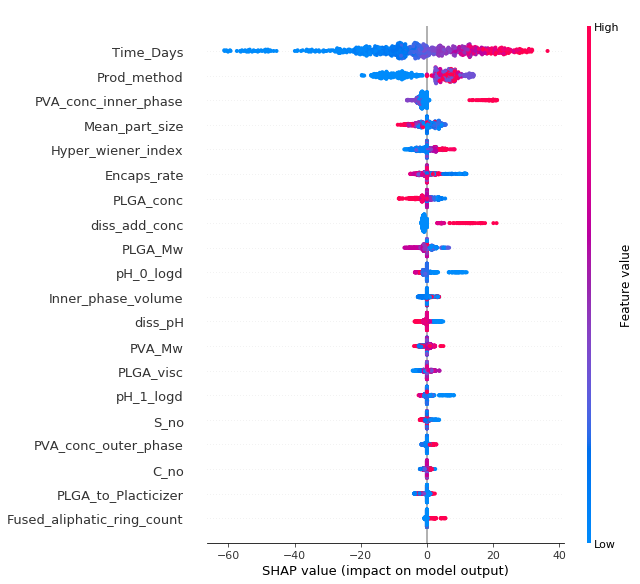

In [30]:
shap_summary = shap.summary_plot(shap_values, trainX)

We can also just take the mean absolute value of the SHAP values for each feature to get a standard bar plot (produces stacked bars for multi-class outputs):

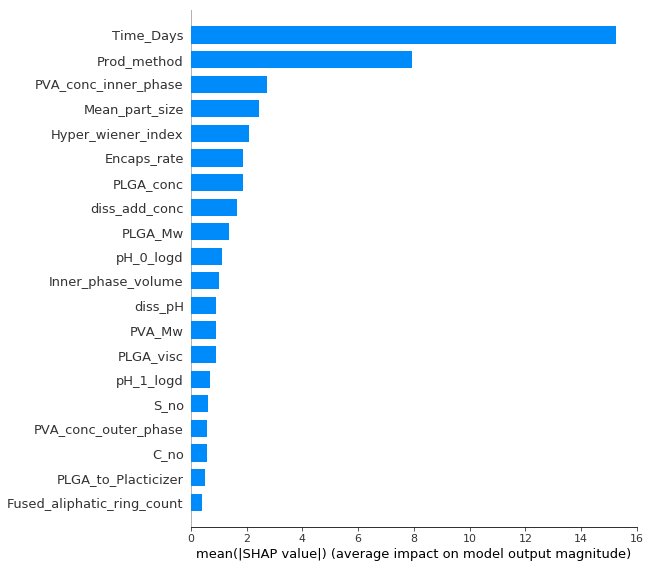

In [31]:
shap_summary_bar = shap.summary_plot(shap_values, trainX, plot_type="bar")

## References:
  1. https://github.com/jszlek/h2o_AutoML_Python
  2. https://github.com/slundberg/shap
  3. http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
  4. https://docs.conda.io/en/latest/